<a href="https://colab.research.google.com/github/habstrakT808/House-Price-Prediction-with-Random-Forest-and-Gradient-Boosting/blob/main/Prediksi_Harga_Rumah_di_Kawasan_Tebet_Menggunakan_Algoritma_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Harga Rumah di Kawasan Tebet Menggunakan Algoritma Machine Learning**

## **Deskripsi Proyek**
Proyek ini bertujuan untuk membangun sebuah model prediksi harga rumah di kawasan Tebet dengan menggunakan pendekatan machine learning. Dataset yang digunakan berisi informasi mengenai berbagai fitur properti rumah, seperti luas bangunan (LB), luas tanah (LT), jumlah kamar tidur (KT), jumlah kamar mandi (KM), kapasitas garasi (GRS), dan harga rumah (HARGA). Dalam proyek ini, kita akan melakukan eksplorasi data untuk memahami pola harga rumah, menangani data hilang, dan melakukan pra-pemrosesan agar dataset siap digunakan untuk pelatihan model.

Link Dataset: [Kaggle Dataset](https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah?resource=download)

Berbagai algoritma machine learning, termasuk *Random Forest Regressor*, dan *Gradient Boosting* akan diterapkan untuk membangun model prediksi yang dapat memprediksi harga rumah berdasarkan fitur-fitur yang ada. Model ini diharapkan dapat memberikan wawasan yang lebih baik dalam memperkirakan harga properti, yang sangat relevan bagi pembeli atau investor properti.

### **Langkah-langkah Proyek:**
1. Persiapan dan Import Library
2. Pra-pemrosesan Data
3. Pemilihan Fitur, Pembagian Data, dan Scaling
4. Membangun dan Menyempurnakan Model dengan Hyperparameter Tuning
5. Evaluasi Model dengan Metrik Kinerja
6. Visualisasi Hasil Prediksi
7. Eksekusi Utama dan Integrasi Semua Langkah
8. Prediksi Harga Rumah Berdasarkan Spesifikasi

Melalui proyek ini, kita tidak hanya berfokus pada pembangunan model prediksi, tetapi juga berusaha memberikan pemahaman mendalam mengenai pengolahan dan analisis data properti yang dapat diaplikasikan dalam berbagai kasus dunia nyata.

### **Tujuan:**
- Membangun model prediksi harga rumah yang akurat.
- Menyediakan alat untuk membantu pembeli dan investor properti dalam menentukan harga rumah yang wajar.


## **Langkah 1: Persiapan dan Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Penjelasan**:  
Pada langkah pertama, kode ini melakukan inisialisasi dan import berbagai library yang diperlukan untuk analisis data dan pembangunan model.  
- `pandas` dan `numpy` digunakan untuk manipulasi data dan operasi numerik.
- `train_test_split` dari `sklearn.model_selection` digunakan untuk membagi dataset menjadi data latih dan uji.
- `StandardScaler` dan `RobustScaler` dari `sklearn.preprocessing` digunakan untuk menormalkan data dengan pendekatan yang berbeda.
- `RandomForestRegressor` dan `GradientBoostingRegressor` dari `sklearn.ensemble` adalah algoritma regresi yang digunakan untuk model prediksi harga rumah.
- `mean_absolute_error`, `mean_squared_error`, dan `r2_score` digunakan untuk mengevaluasi kinerja model.
- `matplotlib` dan `seaborn` digunakan untuk visualisasi data dan hasil analisis.

Kode ini menyusun fondasi untuk membangun model machine learning dan evaluasi menggunakan regresi pada dataset yang dimiliki.

## **Langkah 2: Pra-pemrosesan Data dan Feature Engineering**

In [ ]:
def prepare_data(df):
    # 2.1 Menangani outlier dengan IQR method
    def remove_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Hapus outlier dari kolom numerik
    for column in ['LB', 'LT', 'HARGA']:
        df = remove_outliers(df, column)

    # 2.2 Feature Engineering
    # Rasio luas bangunan terhadap luas tanah
    df['LB_LT_RATIO'] = df['LB'] / df['LT']

    # Kamar per luas bangunan
    df['ROOM_DENSITY'] = (df['KT'] + df['KM']) / df['LB']

    # Total ruangan
    df['TOTAL_ROOMS'] = df['KT'] + df['KM']

    return df

**Penjelasan**:  
Pada langkah kedua, kode ini mempersiapkan data untuk analisis lebih lanjut dengan menangani outlier dan menambahkan fitur baru (feature engineering).  
- **Menangani Outlier**:  
  Fungsi `remove_outliers` menggunakan metode Interquartile Range (IQR) untuk mendeteksi dan menghapus nilai-nilai yang jauh dari rentang distribusi normal pada kolom yang relevan seperti `LB` (Luas Bangunan), `LT` (Luas Tanah), dan `HARGA`.  
- **Feature Engineering**:  
  Beberapa fitur baru ditambahkan untuk meningkatkan kualitas data dan model:
  - **`LB_LT_RATIO`**: Rasio antara luas bangunan (`LB`) dan luas tanah (`LT`) untuk memberikan wawasan tentang efisiensi ruang.
  - **`ROOM_DENSITY`**: Rasio antara jumlah kamar tidur (`KT`) dan kamar mandi (`KM`) terhadap luas bangunan, menggambarkan kepadatan ruangan per luas bangunan.
  - **`TOTAL_ROOMS`**: Jumlah total kamar (kamar tidur + kamar mandi) yang dapat memberikan gambaran umum tentang ukuran rumah.

Dengan pra-pemrosesan ini, dataset menjadi lebih bersih dan fitur-fitur yang lebih informatif siap digunakan dalam model machine learning.

## **Langkah 3: Pemilihan Fitur, Pembagian Data, dan Scaling**

In [ ]:
def preprocess_data(df):
    # 3.1 Pemilihan fitur
    features = ['LB', 'LT', 'KT', 'KM', 'GRS', 'LB_LT_RATIO', 'ROOM_DENSITY', 'TOTAL_ROOMS']
    X = df[features]
    y = df['HARGA']

    # 3.2 Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3.3 Scaling menggunakan RobustScaler (lebih tahan terhadap outlier)
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Kembalikan ke DataFrame
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

**Penjelasan**:  
Langkah ketiga ini mempersiapkan data untuk pemodelan dengan memilih fitur yang relevan, membagi data menjadi set pelatihan dan pengujian, serta melakukan skala data untuk meningkatkan kinerja model.  
- **Pemilihan Fitur**:  
  Kolom fitur yang relevan untuk analisis dipilih dalam variabel `features`, yang mencakup variabel numerik dan fitur hasil dari feature engineering sebelumnya. Kolom target `HARGA` dipisahkan sebagai variabel `y`.
  
- **Pembagian Data (Train-test Split)**:  
  Data dibagi menjadi dua bagian menggunakan fungsi `train_test_split` dengan 80% untuk data pelatihan dan 20% untuk data pengujian. Ini membantu dalam evaluasi model yang lebih objektif.
  
- **Scaling Data (RobustScaler)**:  
  Menggunakan **RobustScaler** untuk menormalkan data, yang lebih tahan terhadap outlier dibandingkan dengan metode standar seperti **StandardScaler**. Proses ini mengubah skala fitur agar model tidak terpengaruh oleh skala yang berbeda antara fitur, meningkatkan kinerja model.

Dengan langkah ini, data siap untuk digunakan dalam proses pelatihan model yang lebih baik dan lebih stabil.

## **Langkah 4: Membangun dan Menyempurnakan Model dengan Hyperparameter Tuning**

In [ ]:
def build_and_tune_model(X_train, y_train):
    # 4.1 Random Forest dengan GridSearchCV
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    rf = RandomForestRegressor(random_state=42)
    rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    rf_grid.fit(X_train, y_train)

    # 4.2 Gradient Boosting
    gb_params = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }

    gb = GradientBoostingRegressor(random_state=42)
    gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    gb_grid.fit(X_train, y_train)

    return rf_grid, gb_grid


**Penjelasan**:  
Pada langkah ini, dua model regresi yang berbeda dibangun dan disempurnakan menggunakan teknik tuning hyperparameter dengan **GridSearchCV** untuk mencari kombinasi parameter terbaik.  
- **Random Forest dengan GridSearchCV**:  
  Model **Random Forest** dioptimalkan menggunakan **GridSearchCV**, yang menguji berbagai kombinasi parameter untuk menemukan model terbaik berdasarkan **mean absolute error (MAE)**. Beberapa parameter yang diuji meliputi jumlah estimator (`n_estimators`), kedalaman maksimal pohon (`max_depth`), serta jumlah sampel minimal yang dibutuhkan untuk membagi node (`min_samples_split`) dan jumlah sampel minimal untuk membuat node daun (`min_samples_leaf`).

- **Gradient Boosting dengan GridSearchCV**:  
  Model **Gradient Boosting** juga disempurnakan dengan **GridSearchCV**. Beberapa parameter yang diuji untuk model ini adalah jumlah estimator (`n_estimators`), laju pembelajaran (`learning_rate`), dan kedalaman maksimal pohon (`max_depth`).

Kedua model ini dilatih dengan data pelatihan (`X_train` dan `y_train`) menggunakan teknik validasi silang (`cv=5`) untuk mendapatkan estimasi kinerja yang lebih andal.

Hasilnya adalah dua objek **GridSearchCV** yang berisi model dengan parameter terbaik yang telah disesuaikan.

## **Langkah 5: Evaluasi Model dengan Metrik Kinerja**

In [ ]:
def evaluate_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        predictions = model.predict(X_test)
        mae = mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        r2 = r2_score(y_test, predictions)

        results[name] = {
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        }

        print(f"\nMetrik Evaluasi untuk {name}:")
        print(f"MAE: Rp {mae:,.2f}")
        print(f"RMSE: Rp {rmse:,.2f}")
        print(f"R²: {r2:.3f}")

    return results

**Penjelasan**:  
Pada langkah ini, berbagai metrik evaluasi digunakan untuk menilai kinerja dari model-model yang telah dibangun sebelumnya. Fungsi `evaluate_models` menerima dua argumen utama: **models** (sebuah dictionary yang berisi model yang telah dilatih) dan **X_test** serta **y_test** sebagai data pengujian.

Metrik evaluasi yang digunakan:
- **MAE (Mean Absolute Error)**: Mengukur rata-rata kesalahan absolut antara harga yang diprediksi dan harga aktual, memberikan gambaran tentang seberapa besar kesalahan prediksi rata-rata.
- **RMSE (Root Mean Squared Error)**: Mengukur akar kuadrat dari rata-rata kesalahan kuadrat. RMSE memberikan gambaran tentang seberapa besar kesalahan prediksi dengan penalti lebih besar untuk kesalahan yang lebih besar.
- **R² (R-squared)**: Mengukur seberapa baik model menjelaskan variasi dalam data. Nilai R² mendekati 1 menunjukkan model yang baik dalam memprediksi hasil.

Untuk setiap model dalam dictionary `models`, fungsi ini menghitung metrik tersebut dan mencetak hasil evaluasi. Semua hasil evaluasi disimpan dalam sebuah dictionary `results` untuk keperluan lebih lanjut.

## **Langkah 6: Visualisasi Hasil Prediksi**

In [ ]:
def plot_results(models, X_test, y_test):
    plt.figure(figsize=(15, 6))

    for i, (name, model) in enumerate(models.items(), 1):
        predictions = model.predict(X_test)

        plt.subplot(1, 2, i)
        plt.scatter(y_test, predictions, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Harga Aktual')
        plt.ylabel('Harga Prediksi')
        plt.title(f'Prediksi vs Aktual - {name}')

    plt.tight_layout()
    plt.show()

**Penjelasan**:  
Pada langkah ini, fungsi `plot_results` digunakan untuk memvisualisasikan perbandingan antara harga yang diprediksi oleh model dan harga aktual (dari data uji) untuk masing-masing model. Fungsi ini membuat plot yang membandingkan hasil prediksi dengan nilai aktual dalam bentuk scatter plot.

Fitur utama dari fungsi ini:
- **Scatter plot**: Untuk setiap model yang diberikan, scatter plot akan menunjukkan titik-titik yang merepresentasikan harga aktual di sumbu x dan harga yang diprediksi oleh model di sumbu y. Titik-titik ini akan menunjukkan sejauh mana prediksi model mendekati harga sebenarnya.
- **Garis referensi**: Garis merah putus-putus (`'r--'`) menunjukkan garis ideal di mana harga prediksi sama dengan harga aktual. Semakin dekat titik-titik dengan garis ini, semakin baik kinerja model dalam memprediksi harga.
- **Subplots**: Fungsi ini menghasilkan dua subplot (satu untuk setiap model) dalam satu baris, memungkinkan perbandingan visual yang mudah antara dua model yang dievaluasi.

Dengan menampilkan visualisasi ini, kita dapat lebih mudah memahami bagaimana performa model-model tersebut dalam memprediksi harga rumah.

## **Langkah 7: Eksekusi Utama dan Integrasi Semua Langkah**


Metrik Evaluasi untuk Random Forest:
MAE: Rp 1,026,505,867.58
RMSE: Rp 1,452,379,881.55
R²: 0.680

Metrik Evaluasi untuk Gradient Boosting:
MAE: Rp 1,034,015,348.56
RMSE: Rp 1,492,548,191.79
R²: 0.663


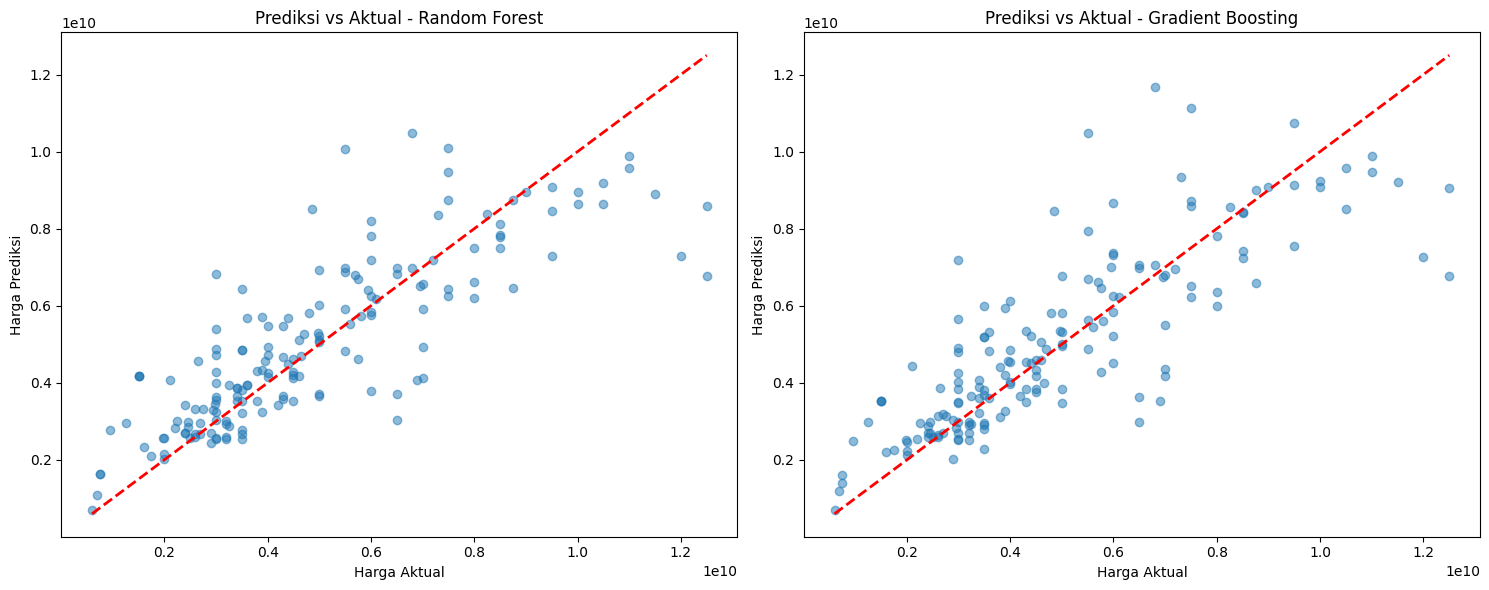

In [ ]:
def main():
    # Baca data
    df = pd.read_csv("data_rumah.csv")

    # Prepare data
    df_cleaned = prepare_data(df)

    # Preprocess data
    X_train_scaled, X_test_scaled, y_train, y_test, scaler = preprocess_data(df_cleaned)

    # Build and tune models
    rf_model, gb_model = build_and_tune_model(X_train_scaled, y_train)

    # Evaluate models
    models = {
        'Random Forest': rf_model.best_estimator_,
        'Gradient Boosting': gb_model.best_estimator_
    }

    results = evaluate_models(models, X_test_scaled, y_test)

    # Plot results
    plot_results(models, X_test_scaled, y_test)

    return models, scaler

if __name__ == "__main__":
    models, scaler = main()

**Penjelasan**:  
Pada langkah ini, fungsi `main()` bertindak sebagai eksekutor yang menggabungkan semua langkah-langkah sebelumnya untuk menjalankan seluruh pipeline dari pembacaan data hingga evaluasi model dan visualisasi hasil.

Fitur utama dari fungsi ini:
1. **Pembacaan Data**: Data dibaca dari file CSV (`data_rumah.csv`) dan disiapkan untuk diproses lebih lanjut dengan memanggil fungsi `prepare_data`.
2. **Preprocessing Data**: Data yang sudah dibersihkan diproses lebih lanjut melalui `preprocess_data` yang mencakup pemilihan fitur, pembagian data menjadi train dan test, serta normalisasi.
3. **Pembangunan dan Penalaan Model**: Model Random Forest dan Gradient Boosting dibangun dan dituning menggunakan `build_and_tune_model` dengan pencarian parameter terbaik menggunakan GridSearchCV.
4. **Evaluasi Model**: Hasil prediksi dari kedua model dievaluasi dengan menggunakan metrik MAE, RMSE, dan R², yang dihitung dalam fungsi `evaluate_models`.
5. **Visualisasi Hasil**: Hasil evaluasi divisualisasikan dengan scatter plot melalui fungsi `plot_results` untuk membandingkan prediksi dengan harga aktual.
6. **Pengembalian Hasil**: Model yang sudah terlatih (dengan parameter terbaik) dan scaler dikembalikan untuk digunakan lebih lanjut atau disimpan.

Fungsi `main()` ini akan dipanggil jika file dijalankan langsung, memastikan bahwa seluruh proses dari pembacaan data hingga evaluasi dan visualisasi model berjalan dengan baik.

## **Langkah 8: Prediksi Harga Rumah Berdasarkan Spesifikasi**


----
### Prediksi Satu Rumah

In [ ]:
def predict_house_price(models, scaler, specs):
    """
    Memprediksi harga rumah berdasarkan spesifikasi yang diberikan
    """
    # Buat DataFrame dari spesifikasi
    new_data = pd.DataFrame([specs])

    # Feature engineering
    new_data['LB_LT_RATIO'] = new_data['LB'] / new_data['LT']
    new_data['ROOM_DENSITY'] = (new_data['KT'] + new_data['KM']) / new_data['LB']
    new_data['TOTAL_ROOMS'] = new_data['KT'] + new_data['KM']

    # Normalisasi data
    new_data_scaled = scaler.transform(new_data)

    # Pastikan kolom sesuai dengan yang digunakan saat pelatihan
    new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data.columns)

    # Prediksi dengan kedua model
    results = {}
    for name, model in models.items():
        prediction = model.predict(new_data_scaled)[0]
        results[name] = prediction

    return results

# Contoh penggunaan:
# Masukkan spesifikasi rumah yang diinginkan
house_specs = {
    'LB': 250,    # Luas Bangunan (m²)
    'LT': 300,    # Luas Tanah (m²)
    'KT': 4,      # Jumlah Kamar Tidur
    'KM': 3,      # Jumlah Kamar Mandi
    'GRS': 2      # Kapasitas Garasi
}

# Lakukan prediksi
predictions = predict_house_price(models, scaler, house_specs)

# Tampilkan hasil prediksi dengan format yang rapi
print("\nSpesifikasi Rumah:")
print(f"Luas Bangunan: {house_specs['LB']} m²")
print(f"Luas Tanah: {house_specs['LT']} m²")
print(f"Kamar Tidur: {house_specs['KT']}")
print(f"Kamar Mandi: {house_specs['KM']}")
print(f"Kapasitas Garasi: {house_specs['GRS']}")

print("\nPrediksi Harga:")
for model_name, price in predictions.items():
    print(f"{model_name}: Rp {price:,.2f}")


Spesifikasi Rumah:
Luas Bangunan: 250 m²
Luas Tanah: 300 m²
Kamar Tidur: 4
Kamar Mandi: 3
Kapasitas Garasi: 2

Prediksi Harga:
Random Forest: Rp 7,682,419,940.48
Gradient Boosting: Rp 7,801,029,588.55


---
### Prediksi Banyak Rumah

In [ ]:
# Fungsi untuk memprediksi multiple rumah
def predict_multiple_houses(models, scaler, houses_list):
    """
    Memprediksi harga untuk beberapa rumah sekaligus
    """
    results = []
    for i, specs in enumerate(houses_list, 1):
        predictions = predict_house_price(models, scaler, specs)
        results.append({
            'Rumah': i,
            'Spesifikasi': specs,
            'Prediksi': predictions
        })
    return results

# Contoh penggunaan untuk multiple rumah
houses = [
    {
        'LB': 250, 'LT': 300, 'KT': 4, 'KM': 3, 'GRS': 2
    },
    {
        'LB': 320, 'LT': 400, 'KT': 5, 'KM': 4, 'GRS': 3
    },
    {
        'LB': 180, 'LT': 200, 'KT': 3, 'KM': 2, 'GRS': 1
    }
]

# Prediksi multiple rumah
print("\nPrediksi Multiple Rumah:")
results = predict_multiple_houses(models, scaler, houses)

# Tampilkan hasil
for result in results:
    print(f"\nRumah {result['Rumah']}:")
    specs = result['Spesifikasi']
    print(f"Spesifikasi: {specs['LB']}m² LB, {specs['LT']}m² LT, "
          f"{specs['KT']} KT, {specs['KM']} KM, {specs['GRS']} Garasi")
    print("Prediksi Harga:")
    for model_name, price in result['Prediksi'].items():
        print(f"{model_name}: Rp {price:,.2f}")


Prediksi Multiple Rumah:

Rumah 1:
Spesifikasi: 250m² LB, 300m² LT, 4 KT, 3 KM, 2 Garasi
Prediksi Harga:
Random Forest: Rp 7,682,419,940.48
Gradient Boosting: Rp 7,801,029,588.55

Rumah 2:
Spesifikasi: 320m² LB, 400m² LT, 5 KT, 4 KM, 3 Garasi
Prediksi Harga:
Random Forest: Rp 8,958,624,578.05
Gradient Boosting: Rp 9,114,969,462.31

Rumah 3:
Spesifikasi: 180m² LB, 200m² LT, 3 KT, 2 KM, 1 Garasi
Prediksi Harga:
Random Forest: Rp 5,145,434,126.98
Gradient Boosting: Rp 5,417,468,169.64


**Penjelasan**:  
Pada langkah ini, kita menambahkan dua fungsi untuk memprediksi harga rumah berdasarkan spesifikasi yang diberikan.

1. **Fungsi `predict_house_price`**:  
   Fungsi ini menerima model yang telah dilatih, scaler untuk normalisasi data, dan spesifikasi rumah yang ingin diprediksi.
   - Pertama, data spesifikasi rumah diubah menjadi DataFrame.
   - Kemudian dilakukan feature engineering seperti perhitungan rasio luas bangunan terhadap luas tanah, densitas ruangan, dan total jumlah ruangan.
   - Data baru kemudian dinormalisasi menggunakan scaler yang sudah ditentukan sebelumnya.
   - Prediksi harga rumah dilakukan menggunakan model yang telah dilatih (baik Random Forest maupun Gradient Boosting), dan hasilnya dikembalikan dalam bentuk dictionary dengan nama model sebagai kunci dan harga prediksi sebagai nilai.

2. **Fungsi `predict_multiple_houses`**:  
   Fungsi ini memungkinkan prediksi untuk beberapa rumah sekaligus.
   - Fungsi ini menerima daftar spesifikasi rumah dan memanggil fungsi `predict_house_price` untuk setiap rumah dalam daftar.
   - Hasil prediksi untuk masing-masing rumah disimpan dalam list yang kemudian dikembalikan.

**Contoh Penggunaan**:  
- `predict_house_price` digunakan untuk memprediksi harga rumah dengan memasukkan spesifikasi rumah tertentu seperti luas bangunan, luas tanah, jumlah kamar tidur, kamar mandi, dan kapasitas garasi.
- `predict_multiple_houses` digunakan untuk memprediksi harga beberapa rumah sekaligus dengan daftar spesifikasi rumah yang diberikan.
  
Hasil prediksi ditampilkan dengan format yang mudah dibaca, menunjukkan harga yang diprediksi untuk masing-masing model yang digunakan.